[View in Colaboratory](https://colab.research.google.com/github/MarkGardnerCSU/the4thparadigm/blob/master/spotify_eda.ipynb)

#Introduction

This short exercise is intended to expose someone to the exploratory data analysis (EDA) process. It's an iterative process where we ask questions about our data, and try to answer them, often using visualizations. This is also an opportunity to play around with Python, Jupyter notebooks, and the Colaboratory platform.


# Setup

 ## Import Packages


In [0]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

## Load Data

Collab allows you to load data from your google drive. Run the following code block and follow the instructions to mount your Google Drive to this Jupyter Notebook. So that 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now you can load the data using Pandas from Google Drive. Change the path string so that it points to the location of the data set. Running this code will load the csv file into a Pandas data frame.

In [0]:
path = "gdrive/My Drive/8-CSU/data_science_club/data.csv"
df = pd.read_csv(path)

# Exploratory Data Analysis

How many rows and columns are in our data set?

In [4]:
df.shape

(2017, 17)

What are the names of the columns?

In [5]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

## Visualizations

Let's create a list of columns that we want to create histograms for. Then let's loop through each one and plot a histogram.

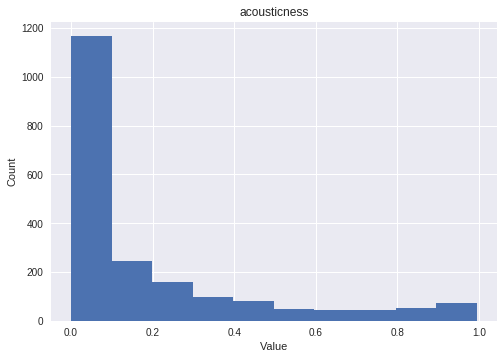

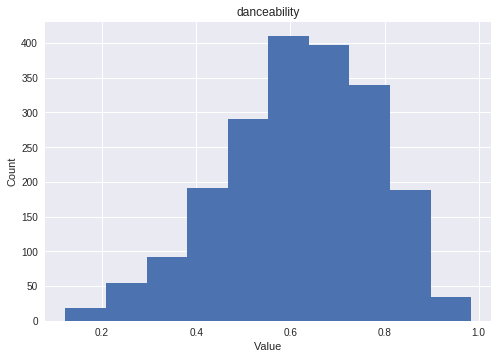

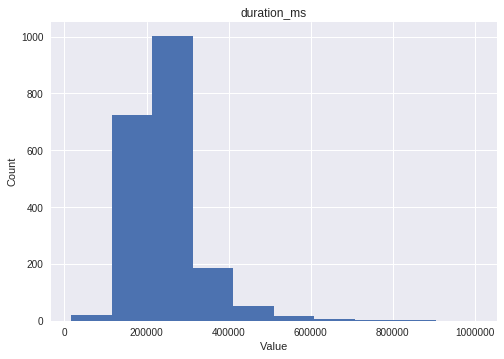

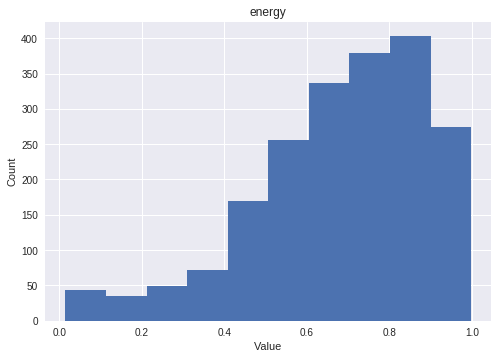

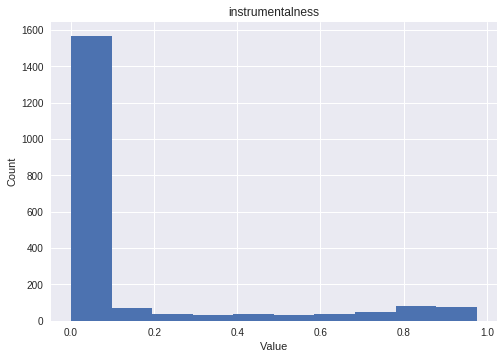

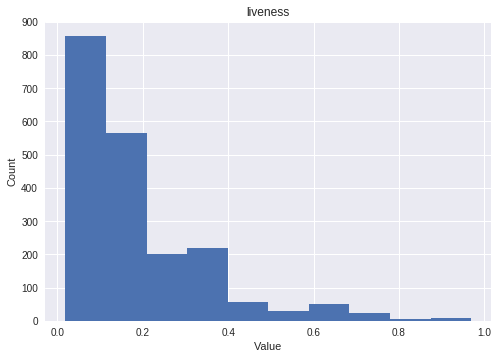

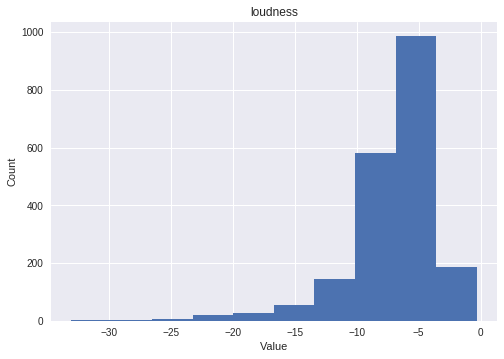

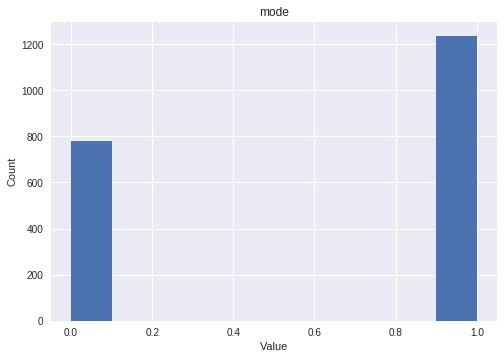

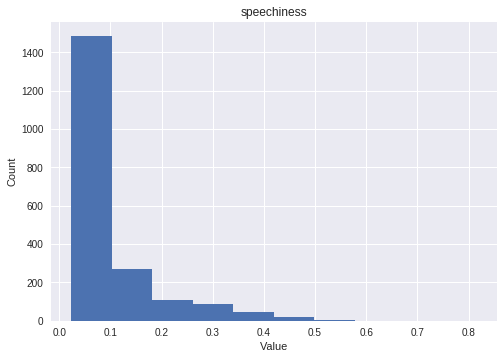

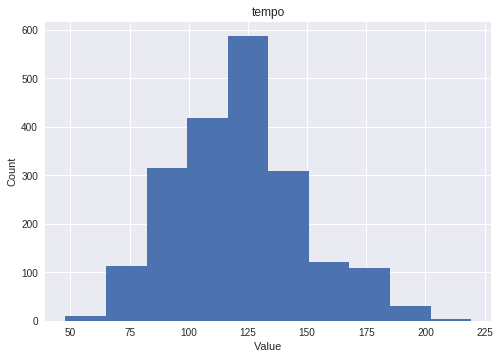

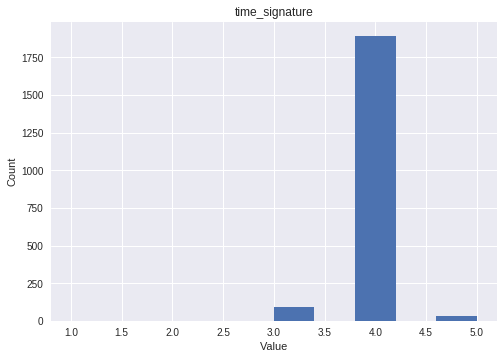

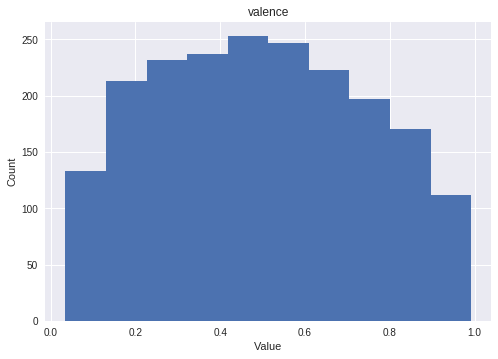

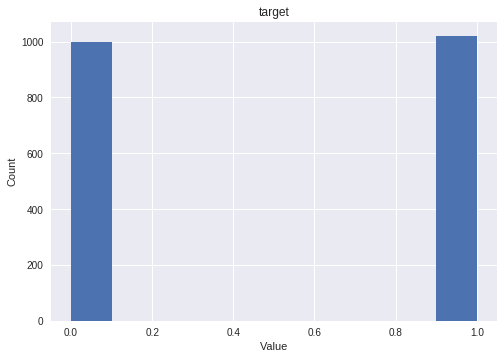

In [6]:
#for i in range(len(df.columns)):
cols = ["acousticness", "danceability", "duration_ms", "energy", 
        "instrumentalness", "liveness", "loudness", "mode", "speechiness",
        "tempo", "time_signature", "valence", "target"]
for col in cols:
  plt.hist(df[col])
  plt.ylabel("Count")
  plt.xlabel("Value")
  plt.title(col)
  plt.show()

Instrumentalness and accousticness look similar, I wonder how they compare to each other? Let's make a scatter plot:

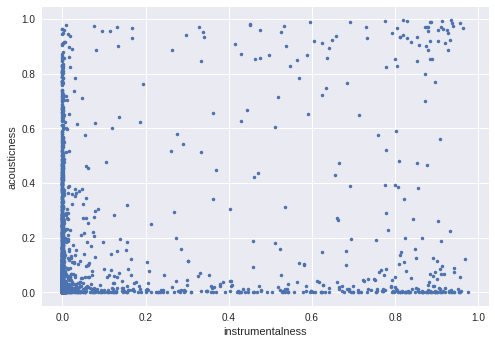

In [7]:
plt.plot(df["instrumentalness"], df["acousticness"], ".")
plt.xlabel("instrumentalness")
plt.ylabel("acousticness")
plt.show()

There doesn't look like any obvious relationship between the two, but there are a lot of points near the zeros (which is obvious if you look at the histograms), so let's recreate the plot with log axes.

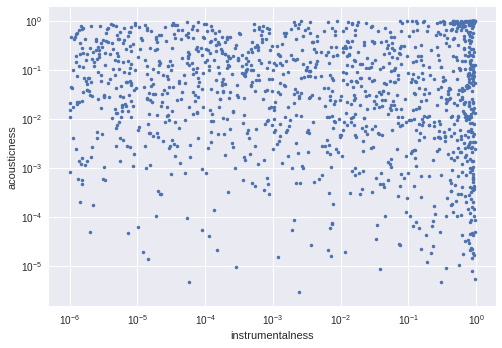

In [8]:
plt.plot(df["instrumentalness"], df["acousticness"], ".")
plt.xlabel("instrumentalness")
plt.ylabel("acousticness")
plt.yscale('log')
plt.xscale('log')
plt.show()

Okay, it still doesn't look interesting, but it was worth a shot!

While we're comparing variables against each other, why don't we just compare several pairs of variables all at once?




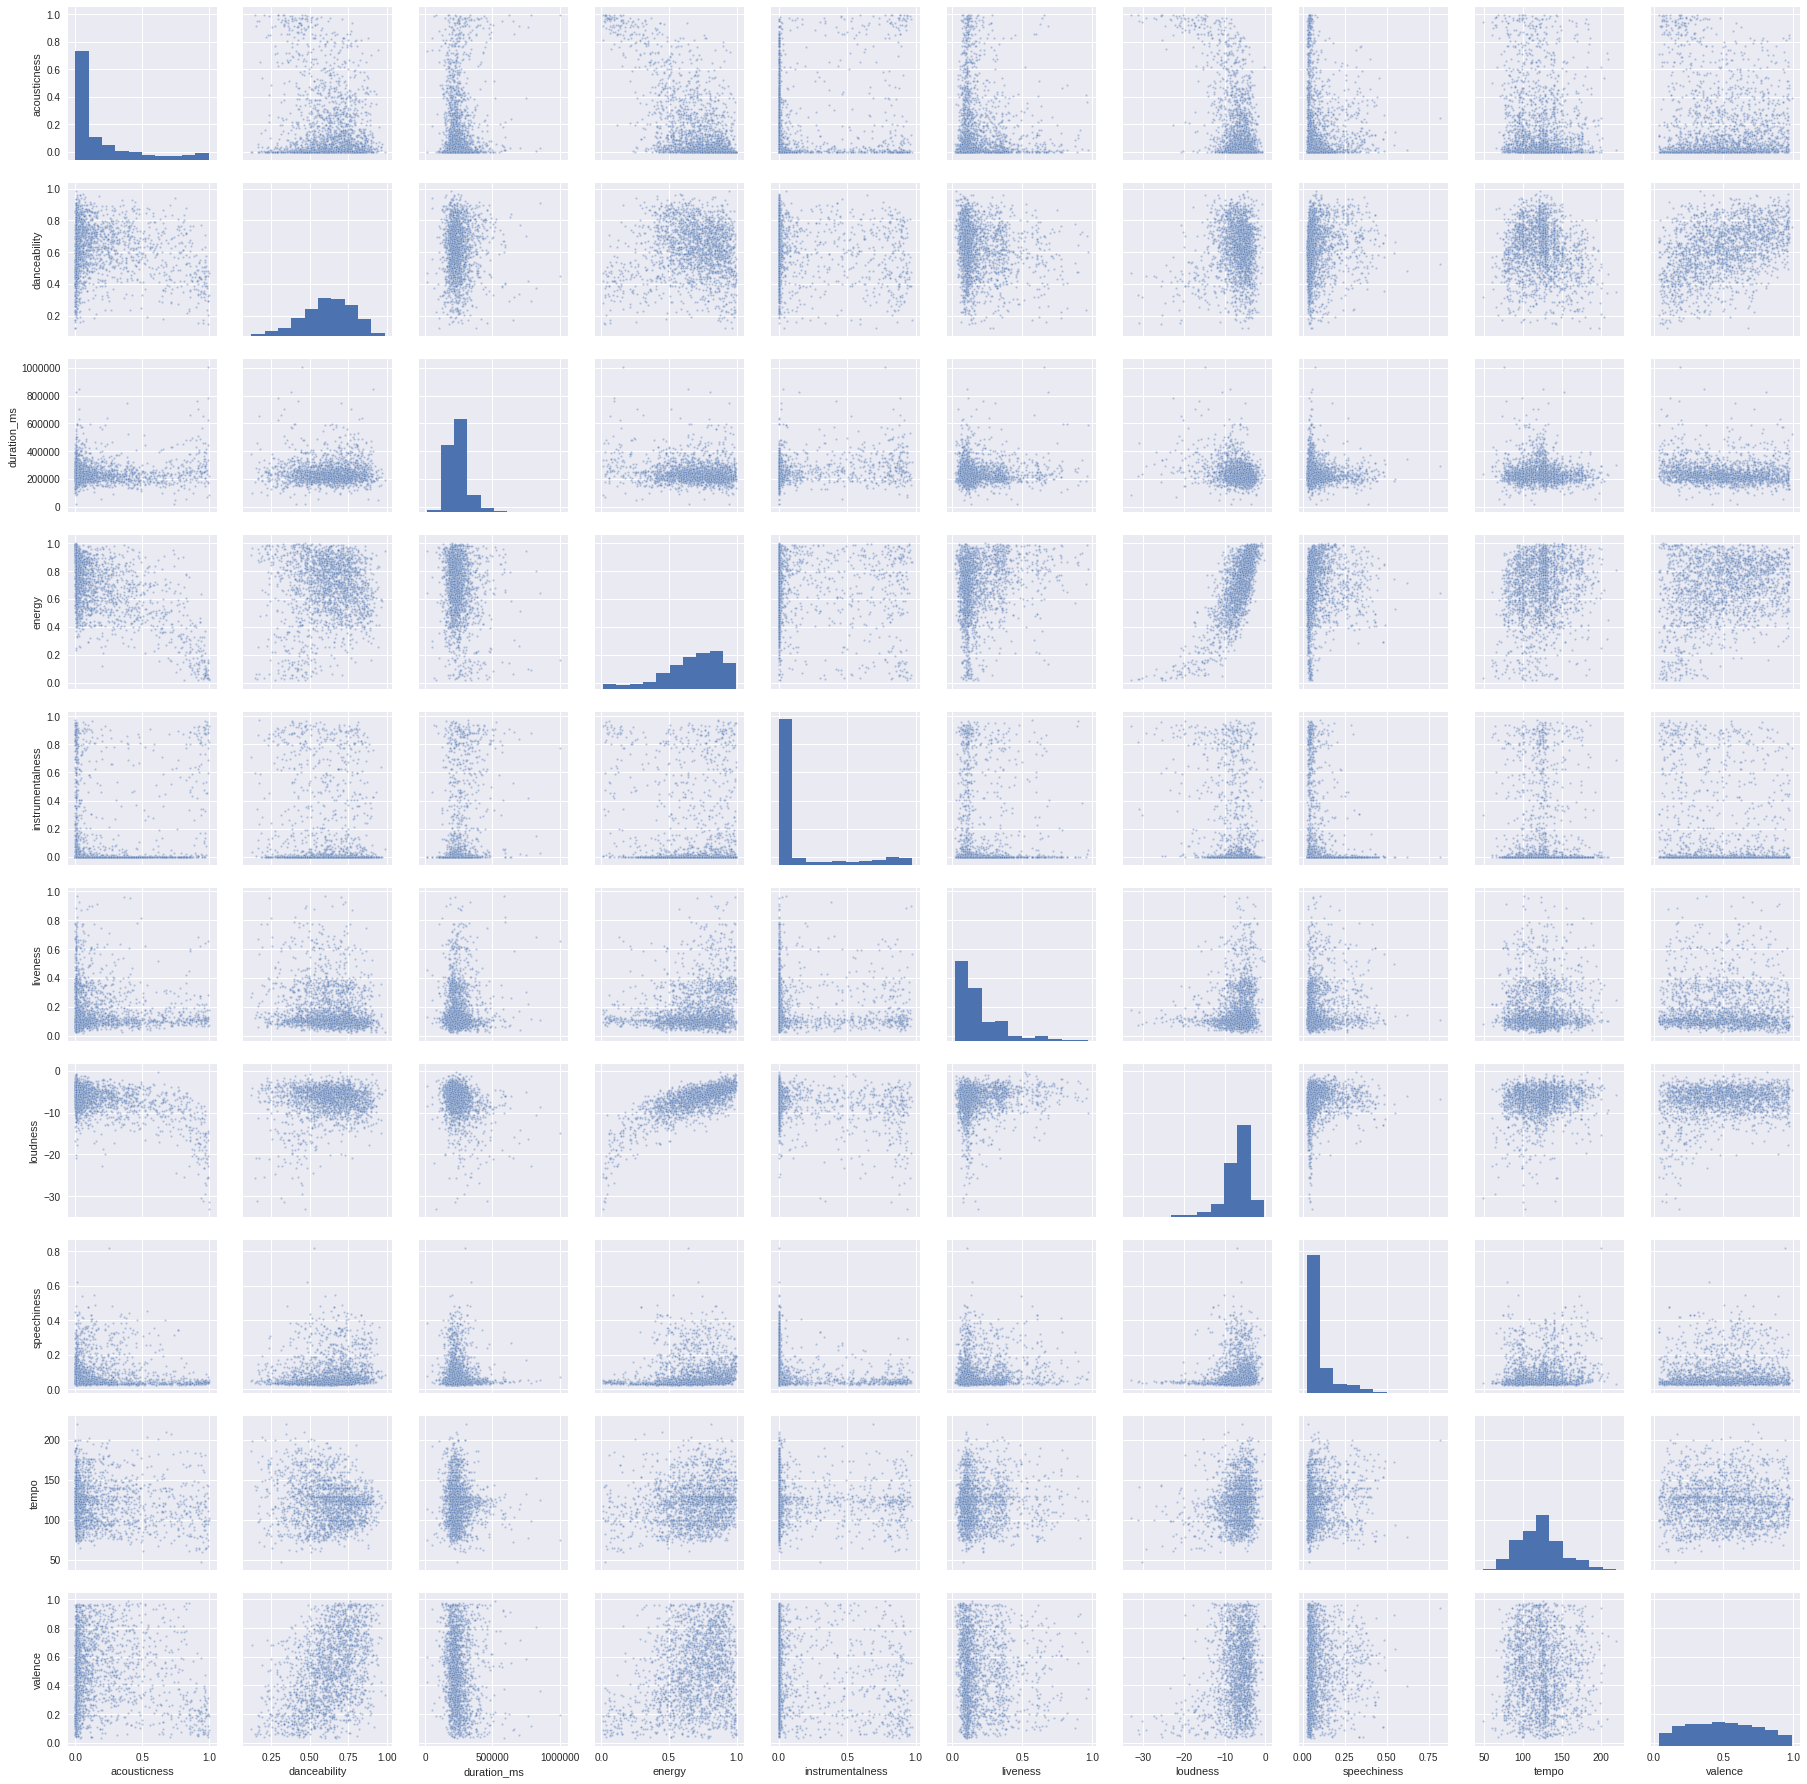

In [9]:
cols2 = ["acousticness", "danceability", "duration_ms", "energy", 
        "instrumentalness", "liveness", "loudness", "speechiness",
        "tempo", "valence"]
df_subset = df[cols2]
#sns.pairplot(df_subset, plot_kws={'s':5, 'scatter_kws': {'alpha': 0.1}})
sns.pairplot(df_subset, plot_kws={'s':5, 'alpha': 0.4})

There are some interesting relationships in here, like accousticness vs. loudness, accousticness vs. energy, dancability vs. energy. What other interesting relationships can you identify?

##Data Auditing

Before we go too far, let's see if there are any issues in the data set. Are there any duplicated artists/songs?

In [10]:
duplicates = df.duplicated(["artist", "song_title"], keep=False)
print(sum(duplicates))

69


Let's view a list of these duplicates

In [11]:
duplicates = df[duplicates.values]
duplicates.sort_values(["artist", "song_title"])

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1740,1740,0.007990,0.685,209560,0.872,0.000000,7,0.3230,-6.939,1,0.0321,110.046,4.0,0.8060,0,Tearin' up My Heart - Radio Edit,*NSYNC
1910,1910,0.002800,0.686,211000,0.915,0.000007,7,0.2330,-4.447,1,0.0364,110.054,4.0,0.7840,0,Tearin' up My Heart - Radio Edit,*NSYNC
688,688,0.093800,0.874,281373,0.704,0.000000,9,0.4090,-6.270,1,0.1020,119.954,4.0,0.4440,1,Shabba,A$AP Ferg
730,730,0.071500,0.869,275867,0.712,0.000000,9,0.2720,-6.136,1,0.1030,120.000,4.0,0.4580,1,Shabba,A$AP Ferg
690,690,0.024700,0.834,285947,0.732,0.000000,1,0.1120,-5.121,1,0.1380,130.011,4.0,0.3080,1,Work REMIX,A$AP Ferg
731,731,0.024600,0.841,283693,0.733,0.000000,1,0.1740,-5.077,1,0.1420,130.009,4.0,0.2910,1,Work REMIX,A$AP Ferg
1746,1746,0.240000,0.683,213027,0.687,0.000000,6,0.1310,-5.833,0,0.0274,99.035,4.0,0.4860,0,I Want It That Way,Backstreet Boys
1915,1915,0.161000,0.667,213000,0.728,0.000000,6,0.1990,-5.476,0,0.0272,99.014,4.0,0.4490,0,I Want It That Way,Backstreet Boys
480,480,0.036900,0.448,258653,0.733,0.042500,3,0.1690,-6.238,1,0.0292,142.008,4.0,0.4040,1,Myth,Beach House
981,981,0.036900,0.448,258653,0.733,0.042500,3,0.1690,-6.238,1,0.0292,142.008,4.0,0.4040,1,Myth,Beach House


So we see there are some duplicate songs. Some of them have different values for some of the features. So are these different songs, like an accoustic version vs. an original? Maybe we can just average duplicates together. But notice that some duplicates have different lables, like Daft Punk's "Get Lucky". So let's try again, but this time let's only count dupliates that match in all the columns. Remember, each song has a unique ID, so we should ignore that when looking for duplicates.

In [12]:
match_cols = df.columns[1:]
duplicates2 = df.duplicated(match_cols, keep=False)
print(sum(duplicates2))

10


And let's view these duplicates.

In [13]:
duplicates2 = df[duplicates2.values]
duplicates2.sort_values(["artist", "song_title"])

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
480,480,0.036900,0.448,258653,0.733,0.042500,3,0.169,-6.238,1,0.0292,142.008,4.0,0.404,1,Myth,Beach House
981,981,0.036900,0.448,258653,0.733,0.042500,3,0.169,-6.238,1,0.0292,142.008,4.0,0.404,1,Myth,Beach House
714,714,0.000334,0.907,183581,0.616,0.425000,6,0.110,-7.073,0,0.0577,124.036,4.0,0.614,1,Jack,Breach
894,894,0.000334,0.907,183581,0.616,0.425000,6,0.110,-7.073,0,0.0577,124.036,4.0,0.614,1,Jack,Breach
148,148,0.096200,0.654,252095,0.292,0.003100,2,0.106,-12.977,1,0.4740,153.547,4.0,0.111,1,River,Ibeyi
267,267,0.096200,0.654,252095,0.292,0.003100,2,0.106,-12.977,1,0.4740,153.547,4.0,0.111,1,River,Ibeyi
854,854,0.934000,0.440,254360,0.433,0.811000,2,0.273,-17.453,0,0.0412,79.952,4.0,0.217,1,Episode I - Duel of The Fates,John Williams
927,927,0.934000,0.440,254360,0.433,0.811000,2,0.273,-17.453,0,0.0412,79.952,4.0,0.217,1,Episode I - Duel of The Fates,John Williams
172,172,0.024600,0.586,374133,0.806,0.000167,1,0.353,-9.542,1,0.0548,110.325,4.0,0.207,1,Her Fantasy,Matthew Dear
508,508,0.024600,0.586,374133,0.806,0.000167,1,0.353,-9.542,1,0.0548,110.325,4.0,0.207,1,Her Fantasy,Matthew Dear


Lastly, let's look at the artists represented in our dataset. How many are there?

In [14]:
artists = df.groupby(["artist"])["song_title"].count()
len(artists)


1343

We'll count how many songs each artist has. 

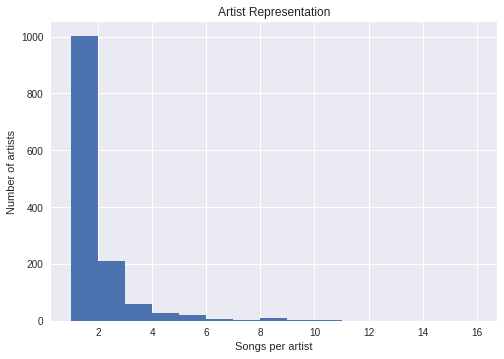

In [15]:
plt.hist(artists, bins=list(range(min(artists), max(artists)+1)))
plt.xlabel("Songs per artist")
plt.ylabel("Number of artists")
plt.title("Artist Representation")
plt.show()

So most artists have just one or two songs in the data set. What are the top represented artists?

In [16]:
artists.sort_values(ascending=False)[1:30]

artist
Rick Ross           13
Disclosure          12
Backstreet Boys     10
WALK THE MOON       10
Crystal Castles      9
FIDLAR               9
Big Time Rush        8
Future               8
Demi Lovato          8
Kina Grannis         8
Fall Out Boy         8
Michael Jackson      8
Kanye West           8
Skrillex             8
*NSYNC               8
The Chainsmokers     7
CHVRCHES             7
Young Thug           7
ASTR                 6
Kendrick Lamar       6
Grimes               6
Meek Mill            6
M83                  6
Hot Chip             6
Beach House          6
Purity Ring          5
Duke Dumont          5
Shakira              5
J. Cole              5
Name: song_title, dtype: int64

### Conclusion

Here we have started to explore our data and develop an intuition about them. We have also tried to identify potential issues in our data set that might require some cleanup before we work with them. Now you try! What other visualizations would you like to try? What other questions do you have? Happy Exploring!


Created October, 2018 by Alex Fout